# INF-0618 - Exercise02

Students: Carlos Eduardo Fernandes and Yakov Nae

Instituto de Computação - Unicamp 2018

# Tarefa 02
Nesta tarefa vocês irão projetar duas arquiteturas de CNN utilizando os conceitos, camadas e técnicas vistas no curso. As redes serão treinadas no dataset CIFAR-10 e depois comparadas. As tarefas são:

**1) Definir as arquiteturas; ----> 0.3 pontos** 

- Quantas [camadas](https://keras.io/layers/core/) ela terá?
- Quais as operações utilizadas (convoluções, pooling, fully-connected)?
- Quais serão os parâmetros de cada camada (número e tamanho dos filtros convolucionais, stride, tamanho do pooling, funções de ativação)?
- Que tipo de [inicialização](https://keras.io/initializers/) de pesos você utilizará?
- Haverá dropout? Qual a taxa de dropout? 
- Haverá [regularização](https://keras.io/regularizers/)? Qual a taxa do regularizador?

**2) Definir como será o treino; ----> 0.25 pontos**
- Número de épocas e tamanho do batch (deixe igual p/ as duas redes);
- [Otimizador](https://keras.io/optimizers/);
- [Função de custo](https://keras.io/losses/);

**3) Classificar o conjunto de teste e comparar os resultados; ----> 0.25 pontos**
- Classificar imagens de teste;
- Comparar acurácias;
- Plotar loss pelo número de épocas no conjunto de treinamento e validação de cada rede. 
    
**4) Escrever um parágrafo com as suas conclusões; ----> 0.2 pontos**

-----

## CIFAR-10
Este conjunto de dados é composto de 60000 imagens coloridas de dimensões 32x32, divididas em 10 classes (com 6000 imagens por classe), sendo 50000 para treinamento e 10000 para teste. As classes do CIFAR-10 são **aviões, automóveis, pássaros, gatos, alces, cachorros, sapos, cavalos, navios, caminhões.**

O código abaixo carrega e transforma os dados de entrada para ficarem prontos para serem treinados/classificados pela sua rede. Os conjuntos de treino, validação e teste estão balanceados, portanto a acurácia já estará normalizada nos métodos do Keras.  

In [1]:
#Imports
import os
import numpy as np
from random import seed
seed(42)

import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import np_utils
#from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit


#Load data
(trainVal_data, trainVal_label), (X_test, y_test) = cifar10.load_data()

# Caso alguem tenha problemas com o StratifiedShuffleSplit, tente descomentar essa versao
#Split trainVal data into train and val sets (already balanced)
# splitIdx = StratifiedShuffleSplit(trainVal_label, 1, test_size=10000, random_state=0)
# for train_index, val_index in splitIdx:
#     X_train, X_val = trainVal_data[train_index], trainVal_data[val_index]
#     y_train, y_val = trainVal_label[train_index], trainVal_label[val_index]
    

splitIdx = StratifiedShuffleSplit(1, test_size=10000, random_state=0)
for train_index, val_index in splitIdx.split(trainVal_data, trainVal_label):
    X_train, X_val = trainVal_data[train_index], trainVal_data[val_index]
    y_train, y_val = trainVal_label[train_index], trainVal_label[val_index]

    
#Transform data
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_val /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Validation matrix shape", X_val.shape)
print("Testing matrix shape", X_test.shape)

Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Using TensorFlow backend.


Training matrix shape (40000, 32, 32, 3)
Validation matrix shape (10000, 32, 32, 3)
Testing matrix shape (10000, 32, 32, 3)


--------
--------
--------
**A tarefa de vocês começa aqui!!!**

# Definir as duas arquiteturas - [0.3 pontos]
***Não se esqueçam de***:
    - Importar as camadas utilizadas e o tipo do modelo (Sequential);
    - Passar o input_shape na primeira camada da rede;
    - Utilizar ativação `softmax` na última camada densa da rede;

In [2]:
#Imports
import time
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers # other stuff needed ... 
from keras import regularizers
import pandas as pd
import numpy as np

nb_classes=10
def reg_y(y):
    y_reg=[]
    for i in range(len(y)):
        y_reg.append(y[i][0])
    return y_reg
unique, counts = np.unique(y_train, return_counts=True)
print("Train ---> ", dict(zip(unique, counts)), "\n")

from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', np.unique(reg_y(y_train)), reg_y(y_train))
train_class_weights = dict(enumerate(class_weights))

unique, counts = np.unique(y_test, return_counts=True)
test_sample_per_class = counts

Train --->  {0: 4000, 1: 4000, 2: 4000, 3: 4000, 4: 4000, 5: 4000, 6: 4000, 7: 4000, 8: 4000, 9: 4000} 



In [3]:
# Define 1st architecture

modelOne = Sequential()
#CONVOLUTIONAL LAYERS
modelOne.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
modelOne.add(MaxPooling2D(pool_size=(2, 2)))
modelOne.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
modelOne.add(MaxPooling2D(pool_size=(2, 2)))
modelOne.add(Conv2D(30, kernel_size=(3, 3), activation='relu'))
#FULLY CONNECTED LAYERS
modelOne.add(Flatten())
modelOne.add(Dropout(.01))
modelOne.add(Dense(1000))
modelOne.add(Activation('relu')) 
modelOne.add(Dropout(.01))
modelOne.add(Dense(1000))
modelOne.add(Activation('relu')) 
modelOne.add(Dense(10, activation='softmax'))

In [4]:
# Define 2nd architecture
modelTwo = Sequential()

modelTwo.add(Conv2D(64, kernel_size=(7, 7), strides=(2,2), padding='valid', activation='relu', input_shape=(32, 32, 3)))
modelTwo.add(Conv2D(16, kernel_size=(5, 5)))
modelTwo.add(Conv2D(64, kernel_size=(3, 3)))
modelTwo.add(MaxPooling2D(pool_size=(1, 1)))
modelTwo.add(Dropout(0.25))
modelTwo.add(Conv2D(16, kernel_size=(1, 1)))
modelTwo.add(MaxPooling2D(pool_size=(1, 1)))
modelTwo.add(Dropout(0.25))
modelTwo.add(Conv2D(1000, kernel_size=(3, 3), strides=(2,2)))
modelTwo.add(MaxPooling2D(pool_size=(3, 3)))
modelTwo.add(Dropout(0.25))
modelTwo.add(Conv2D(1000, kernel_size=(1, 1)))

modelTwo.add(Flatten())
modelTwo.add(Dense(nb_classes, activation='softmax', 
                   kernel_regularizer=regularizers.l2(0.01),
                   activity_regularizer=regularizers.l1(0.01)))

# Treinamento - [0.25 pontos]
***Não se esqueçam de***:
    - Escolher otimizador e loss;
    - Compilar o modelo;
    - Definir número de épocas, tamanho do batch (utilizar o mesmo para ambas as redes);
    - Passar o conjunto de validação em `validation_data`;

In [5]:
N_epochs=10

In [6]:
#Compile first model
seed(42)
start_time = time.time()
sgd = optimizers.SGD(lr=0.05)
modelOne.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#Train first CNN
historyOne = modelOne.fit(X_train, Y_train,
          batch_size=128, epochs=N_epochs, verbose=1,
          class_weight = train_class_weights, 
          validation_data=(X_val, Y_val))
print("modelOne took ",(time.time() - start_time)/60, " minutes")

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 42s 1ms/step - loss: 2.1197 - acc: 0.2238 - val_loss: 1.9331 - val_acc: 0.3159
Epoch 2/10
40000/40000 [==============================] - 44s 1ms/step - loss: 1.8221 - acc: 0.3510 - val_loss: 1.6620 - val_acc: 0.4085
Epoch 3/10
40000/40000 [==============================] - 47s 1ms/step - loss: 1.6265 - acc: 0.4169 - val_loss: 1.5765 - val_acc: 0.4345
Epoch 4/10
40000/40000 [==============================] - 51s 1ms/step - loss: 1.5055 - acc: 0.4626 - val_loss: 1.5272 - val_acc: 0.4462
Epoch 5/10
40000/40000 [==============================] - 43s 1ms/step - loss: 1.4280 - acc: 0.4920 - val_loss: 1.4812 - val_acc: 0.4696
Epoch 6/10
40000/40000 [==============================] - 45s 1ms/step - loss: 1.3618 - acc: 0.5166 - val_loss: 1.3962 - val_acc: 0.5050
Epoch 7/10
40000/40000 [==============================] - 44s 1ms/step - loss: 1.2966 - acc: 0.5390 - val_loss: 1.3296 - val_acc

In [7]:
#Compile second model
seed(42)
start_time = time.time()
modelTwo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Train second CNN
historyTwo = modelTwo.fit(X_train, Y_train,
          batch_size=128, epochs=N_epochs, verbose=1,
          class_weight = train_class_weights, 
          validation_data=(X_val, Y_val))
print("modelTwo took ",(time.time() - start_time)/60, " minutes")

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 137s 3ms/step - loss: 3.2293 - acc: 0.2928 - val_loss: 2.9787 - val_acc: 0.3759
Epoch 2/10
40000/40000 [==============================] - 134s 3ms/step - loss: 2.9268 - acc: 0.4029 - val_loss: 2.8230 - val_acc: 0.4396
Epoch 3/10
40000/40000 [==============================] - 140s 3ms/step - loss: 2.8171 - acc: 0.4438 - val_loss: 2.7487 - val_acc: 0.4685
Epoch 4/10
40000/40000 [==============================] - 130s 3ms/step - loss: 2.7612 - acc: 0.4651 - val_loss: 2.7047 - val_acc: 0.4816
Epoch 5/10
40000/40000 [==============================] - 129s 3ms/step - loss: 2.7153 - acc: 0.4857 - val_loss: 2.6754 - val_acc: 0.5042
Epoch 6/10
40000/40000 [==============================] - 136s 3ms/step - loss: 2.6747 - acc: 0.5002 - val_loss: 2.6680 - val_acc: 0.5132
Epoch 7/10
40000/40000 [==============================] - 129s 3ms/step - loss: 2.6456 - acc: 0.5117 - val_loss: 2.6453 - 

# Resultados no conjunto de teste [0.25 pontos]
***Não se esqueçam de***:
    - Classificar as imagens do conjunto de teste utilizando cada rede;
    - Computar acurácia para cada rede;
    - Comparar ambas as acurácias;
    - Plotar loss pelo número de épocas no conjunto de treinamento e validação de cada rede. 

10000/10000 [==============================] - 5s 458us/step
Test loss: 1.366514425468445
Test accuracy (NOT NORMALIZED): 0.5157
{0: 0.58, 1: 0.568, 2: 0.77, 3: 0.275, 4: 0.311, 5: 0.319, 6: 0.524, 7: 0.669, 8: 0.634, 9: 0.507}
Normalized Acc -->  0.5157 


10000/10000 [==============================] - 6s 591us/step
Test loss: 1.5754162883758545
Test accuracy (NOT NORMALIZED): 0.5518
{0: 0.476, 1: 0.676, 2: 0.32, 3: 0.596, 4: 0.407, 5: 0.273, 6: 0.746, 7: 0.612, 8: 0.749, 9: 0.663}
Normalized Acc -->  0.5518 




<Figure size 576x432 with 0 Axes>

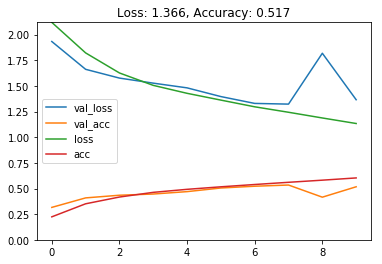

<Figure size 576x432 with 0 Axes>

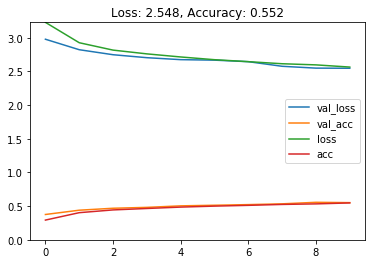

In [11]:
def av_model(model):
    # Classify test set
    score = model.evaluate(X_test, Y_test, verbose=1)


    predicted_classes = model.predict_classes(X_test)
    Y_test_classes = np.argmax(Y_test, axis=-1)

    accPerClass = []
    for classIdx in range(nb_classes):
        idx = (Y_test_classes == classIdx)

        correctPred = np.sum(predicted_classes[idx] == Y_test_classes[idx])
        accPerClass.append( correctPred / float(test_sample_per_class[classIdx]))

    print('Test loss:', score[0])
    print('Test accuracy (NOT NORMALIZED):', score[1])
    print(dict(zip(range(19),accPerClass)))
    print("Normalized Acc --> ", np.mean(accPerClass),"\n\n")
    
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['val_loss'][-1]
    acc = history.history['val_acc'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

plot_loss_accuracy(historyOne)
av_model(modelOne)
plot_loss_accuracy(historyTwo)
av_model(modelTwo)

# Conclusões [0.2 pontos]
Escrevam um parágrafo com as conclusões que vocês tiraram na tarefa. Comentem as diferenças entre as duas arquiteturas e em seus treinamentos, apontando a motivação pelas decisões tomadas. Se o resultado ficou melhor/pior do que o que você esperava, o que você acha que pode ter acontecido?

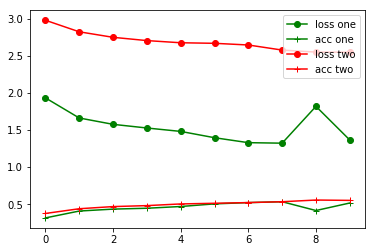

In [10]:
plt.plot(range(N_epochs),historyOne.history['val_loss'],'go-', label='loss one')
plt.plot(range(N_epochs),historyOne.history['val_acc'], '-g+',  label='acc one')
plt.plot(range(N_epochs),historyTwo.history['val_loss'],'ro-', label='loss two')
plt.plot(range(N_epochs),historyTwo.history['val_acc'], '-r+',  label='acc two')
plt.legend()


In this exercise we implemented two different Convolutional Neural Networks for the purpose of classifing 10 category images from the cifar10 database. The convolutional layers are different. On the first model we use 3 convolutional layers that ends up with 30 features. On the second model we use 6 convolutional layers that ends up with 1000 features. The fully connected layers on the first model contain 2 layers with 1000 neurons each that are linked with the 10 categories densed layer. On the second model we connect the features directly to the categories. The first network uses sgd optimizer while the second uses adm. The running time for the second is much higher than the first . the reason is the high number of convolutions compared with the first.

We can see in the last figure that the behaviur of these two model is quite similar. The accurancy of the second model is a bit better then the first. However the loss is lower for the first. For cost benifit reasons, the first network has better results. Note that since it is faster, we can add more epochs.
